# Health Analysis

In [1]:
%run analysis_functions.ipynb

In [2]:
df, arguments = read_clean_data()
sheet_id = arguments["sheet_id"]
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}"

### Raw data: [Google spreadsheet link](url)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Cervical mucus charting

In [3]:
chart_cervical_mucus(
    df,
    with_text=False,
    outfile="charting",
)

#### With dates and descriptions

In [4]:
# Saving a file with descriptions is slow / breaks
chart_cervical_mucus(
    df,
    with_text=True,
)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Symptoms over time

In [ ]:
plot_diet_metric_by_color(
    df=df,
    y_metric="BMs",
    color_metric="diarrhea_bool",
)

### Sleep scores

I use an Oura ring to track my sleep.

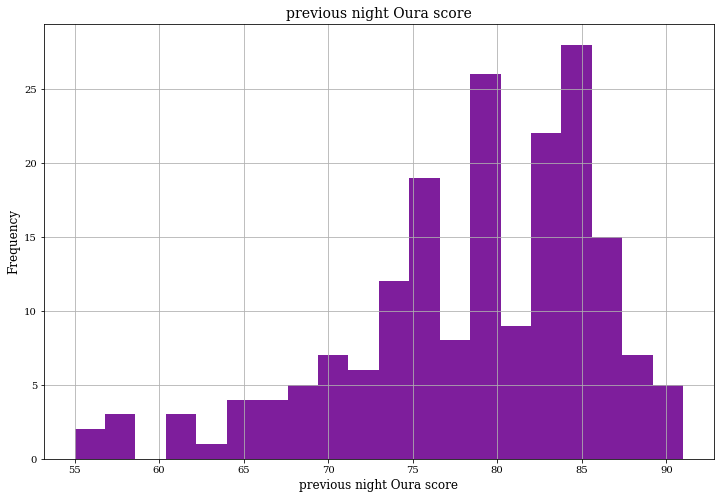

In [5]:
histogram(df, "previous night Oura score")

### Pelvic pain: raw vs. inferred given pain medication

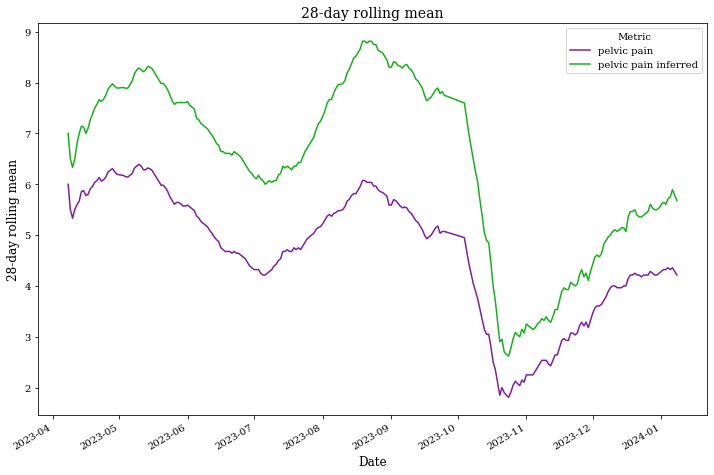

In [6]:
metrics = [
    "pelvic pain numeric",
    "pelvic_pain_inferred",
]
days_window = 28
plot_numeric(df, metrics, days_window)

### THC usage

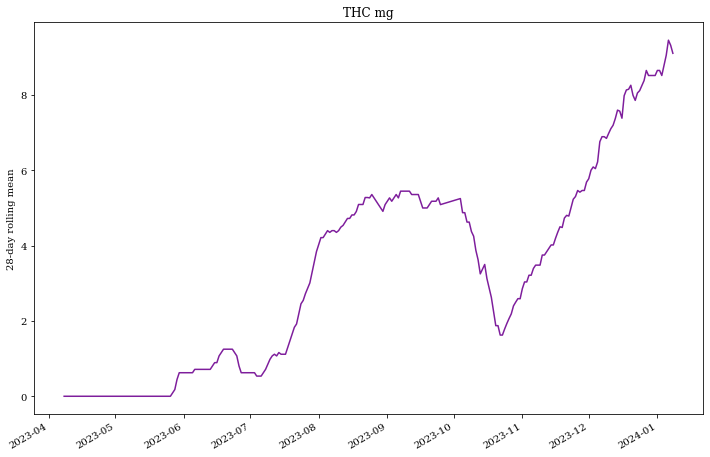

In [7]:
metrics = [
    "THC mg",
]
days_window = 28
plot_numeric(df, metrics, days_window)

### Sleep quality

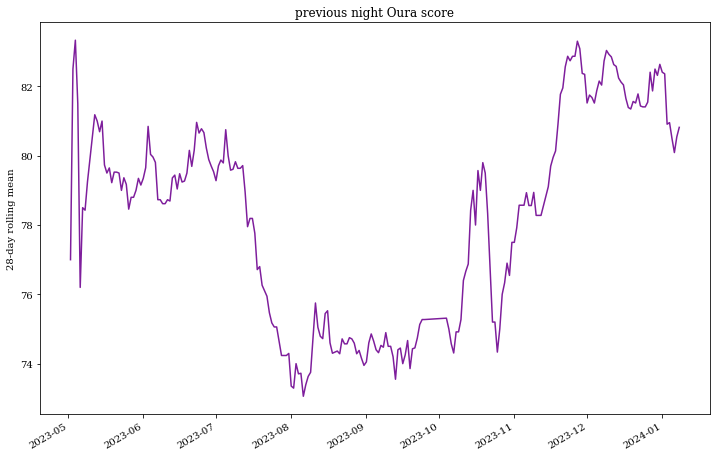

In [8]:
metrics = [
    "previous night Oura score",
]
days_window = 28
plot_numeric(df, metrics, days_window)

### Pelvic pain, highlighting menstruation and ovulation

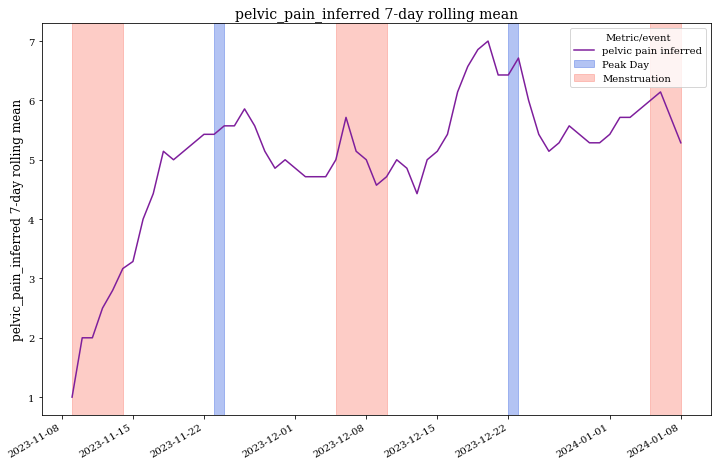

In [9]:
plot_superimpose_cycle(
    df,
    metric="pelvic_pain_inferred",
    days_window=7,
    only_valid_cycles=True,  # set this to false if you want to include dates without known cycle info
)

### Change in pelvic pain vs. 7 days ago

Since pain is hard to quantify, comparing to recent values is more reliable.

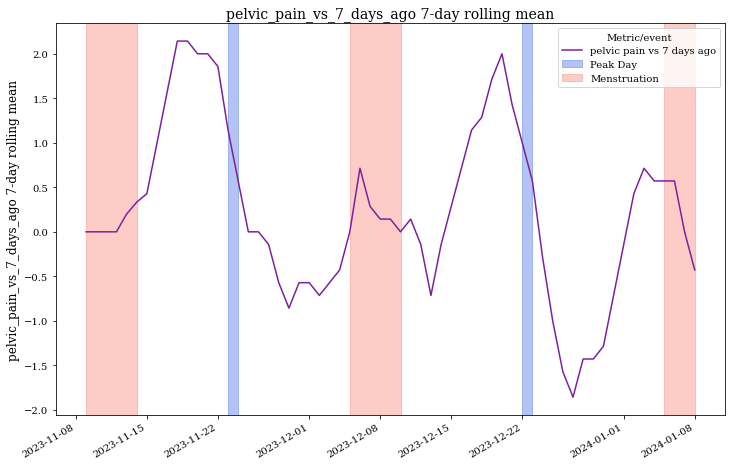

In [10]:
plot_superimpose_cycle(
    df,
    metric="pelvic_pain_vs_7_days_ago",
    days_window=7,
    only_valid_cycles=True,  # set this to false if you want to include dates without known cycle info
)

### Pain and sleep by cycle day

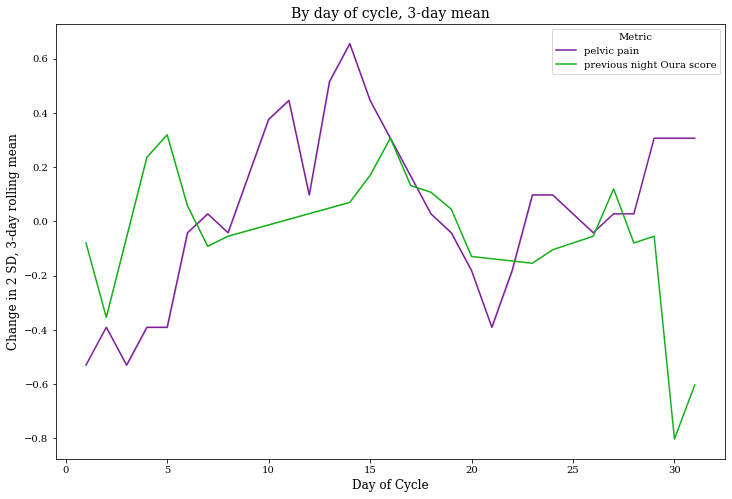

In [11]:
metrics = [
    "pelvic pain",
    "previous night Oura score",
]

# choose a small window to preserve information about the day
days_window = 3

# standardized to make the y-axis sensible despite different units
standardize = True

plot_by_cycle_day(df, metrics, days_window, standardize)

### Does poor sleep predict symptoms?

#### Use steps as a proxy for well-being

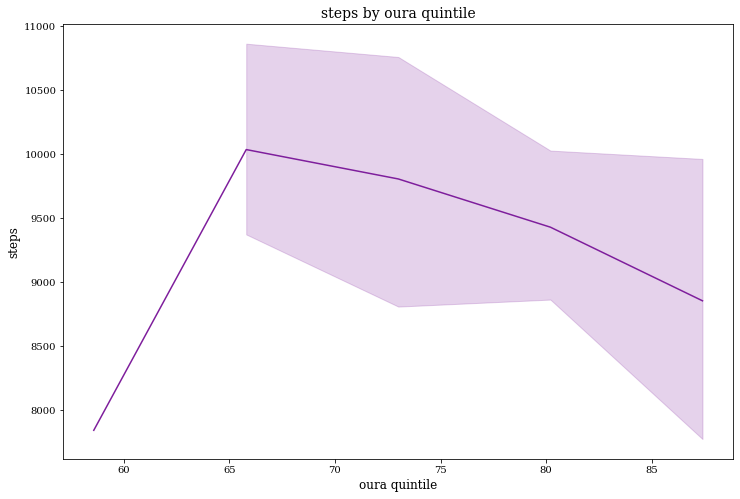

In [13]:
plot_by_group(
    plot_type="line",
    df=df,
    x_var="oura_quintile",
    y_var="steps",
)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Symptoms snapshot

In [14]:
numeric_metrics = [
    "pelvic pain",
    "stomach pain",
    "BMs",
    "previous night Oura score",
    "steps",
]

categorical_metrics = [
    "fatigue",
    "headache",
    "bloated stomach",
    "diarrhea",
    "nauseous",
    "white clouds in urine",
]

#### Last week

In [15]:
# last N days, excluding most recent, incomplete day
last_n_days = 7
start_dt = df[- last_n_days - 1: -1].index.min()
end_dt = df[- last_n_days - 1: -1].index.max()

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
    numeric_metrics,
)
print(summary)

01/01/24 - 01/07/24

100% of days had fatigue.
86% of days had headache.
86% of days had bloated stomach.
57% of days had white clouds in urine.
29% of days had nausea.
14% of days had diarrhea.

4 / 10 pelvic pain
4 / 10 stomach pain
3 BMs / day
78 / 100 sleep score
9,918 steps / day



#### Right before second surgery

In [16]:
start_dt = datetime.datetime(2023, 9, 1)
end_dt = datetime.datetime(2023, 9, 26)

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
    numeric_metrics,
)
print(summary)

09/01/23 - 09/26/23

96% of days had fatigue.
92% of days had headache.
44% of days had white clouds in urine.
44% of days had nausea.
32% of days had bloated stomach.
12% of days had diarrhea.

5 / 10 pelvic pain
5 / 10 stomach pain
2 BMs / day
76 / 100 sleep score
9,094 steps / day



<hr style="height:2px;border-width:0;color:black;background-color:black">

## Medications

#### Today

In [17]:
# second to last day, since today likely isn't over yet
end_dt = df.index[-2]
n_days = 1

summary = generate_med_summary(
    df,
    end_dt,
    n_days,
)
print(summary)

01/07/24 - 01/07/24

8 mg THC / day
8 mg CBD / day
fish oil
Nexium
DHEA
Vitamin B6
Vitamin B12
Pycnogenol
Vitamin D3



#### Last month

In [18]:
end_dt = df.index[-2]
n_days = 28

summary = generate_med_summary(
    df,
    end_dt,
    n_days,
)
print(summary)

12/11/23 - 01/07/24

89 mg Acetaminophen / day
9 mg THC / day
9 mg CBD / day
Zinc
fish oil
Nexium
Esomeprazole
DHEA
Omeprazole
Vitamin B6
Vitamin C
Vitamin B12
Pycnogenol
Vitamin D3



<hr style="height:2px;border-width:0;color:black;background-color:black">

### Check side effects from medication

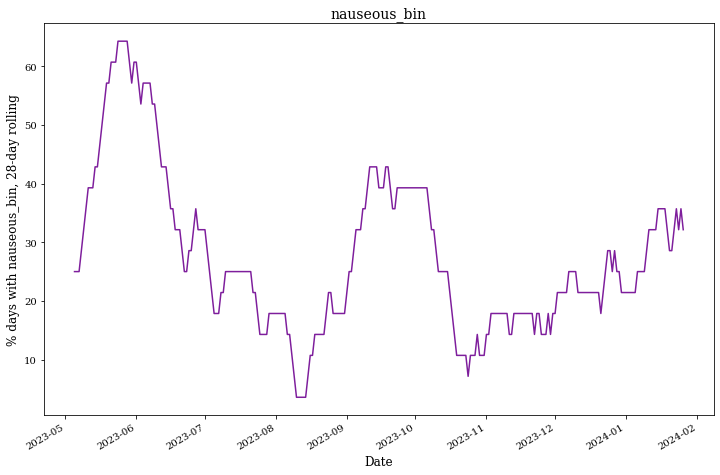

In [10]:
df["nauseous_bin"] = df["nauseous"].astype(str).map(clean_categorical)

metric = "nauseous_bin"
n_days = 28

fig, ax = plt.subplots(figsize=(12, 8), facecolor="w")
plt.plot(
    df.index,
    df[metric].rolling(n_days).mean() * 100,
)

plt.xlabel("Date", size=12)
plt.ylabel(f"% days with {metric}, {n_days}-day rolling", size=12)
plt.title(metric, size=14)
fig.autofmt_xdate()

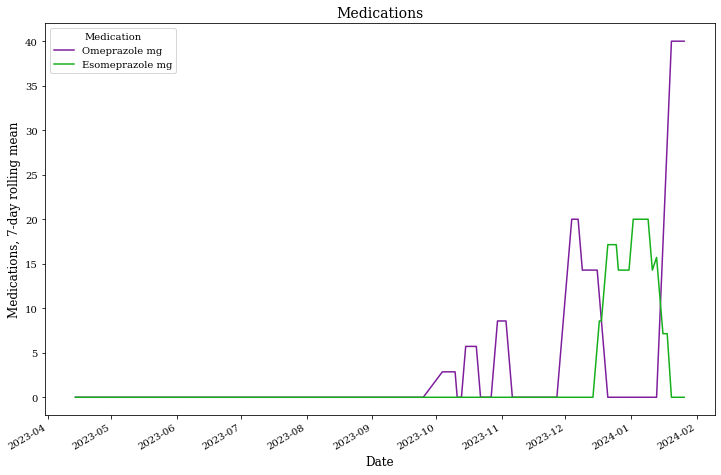

In [11]:
cols = ["Omeprazole mg", "Esomeprazole mg"]
n_days = 7

fig, ax = plt.subplots(figsize=(12, 8), facecolor="w")
for col in cols:
    plt.plot(
        df.index,
        df[col].rolling(n_days).mean(),
        label=col,
    )

plt.xlabel("Date", size=12)
plt.ylabel(f"Medications, {n_days}-day rolling mean", size=12)
plt.title("Medications", size=14)
plt.legend(title="Medication")
fig.autofmt_xdate()

In [12]:
df.loc[df["Omeprazole mg"] == 40].index

DatetimeIndex(['2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-21',
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26'],
              dtype='datetime64[ns]', name='date clean', freq=None)

In [13]:
categorical_metrics = ["nauseous"]

In [14]:
# after surgery, before taking a lot of Omeprazole
start_dt = datetime.datetime(2023, 11, 1)
end_dt = datetime.datetime(2023, 12, 31)

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
)
print(summary)

11/01/23 - 12/31/23

23% of days had nausea.




In [15]:
# directly before increasing Omeprazole
start_dt = datetime.datetime(2024, 1, 1)
end_dt = datetime.datetime(2024, 1, 13)

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
)
print(summary)

01/01/24 - 01/13/24

31% of days had nausea.




In [16]:
# after taking Omeprazole
start_dt = datetime.datetime(2024, 1, 14)
end_dt = datetime.datetime(2024, 1, 25)

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
)
print(summary)

01/14/24 - 01/25/24

42% of days had nausea.


